# Initialisation and Functions

In [7]:
import librosa
import librosa.display
import IPython.display as ipd

#%matplotlib notebook

from matplotlib import mlab
import matplotlib.pyplot as plt
import matplotlib.ticker
import numpy as np

In [8]:
plt.style.use( ['science', 'no-latex'])

In [9]:
def normalize_2d(matrix):
    norm = np.linalg.norm(matrix)
    matrix = matrix/norm  # normalized matrix
    return matrix

In [10]:
def Normalise(matrix):
    MaxVal = np.max(matrix)
    norm_matrix = np.multiply(matrix, 1/MaxVal)
    return norm_matrix

In [11]:
def specgram3d(y, srate=48000, ax=None, title=None):
  
  if not ax:
    ax = plt.axes(projection='3d')
  ax.set_title(title, loc='center', wrap=True)
  
  spec, freqs, t = mlab.specgram(y, Fs=srate, NFFT=512)
  
  #spec = librosa.util.normalize(spec)
  
  norm_spec = Normalise(spec)
  
  log_norm_spec = 20 * np.log10(norm_spec)    
  log_norm_spec[log_norm_spec < -200] =-200 
    
  Y, X, Z = freqs[:round(freqs.size * 0.66):, None], t[None, ], log_norm_spec[:round(freqs.size * 0.66), ]
  
  #ax.plot_trisurf(X, Y, Z)
  p = ax.plot_surface(X, Y, Z , cstride=2, rstride=10, cmap='magma', linewidth=0
                      , antialiased=True, shade=True, vmin=-200 , vmax=0)

  ax.set_xlabel('Time (s)')
  ax.set_xlim(0, )
  
  #plt.colorbar(p, ax=ax)
  cbar = plt.colorbar(p , format="%+2.f dB", shrink=0.5, label='heat map', ticks=[0,-50,-100, -150, -200]) # 
  ax.set_ylabel('Frequency (Hz)')
  #ax.set_ylim(0, 16000 )
    
  ax.set_zlabel('Normalised Amplitude (dB)')
  
  ax.view_init(20,40)
  ax.set_zlim(-200,0)
  return X, Y, Z

In [12]:
def SpecCen_error(Sig_compare, Sig_ref, Frame_Size, Hop_length, sr=48000):
    SC_Sig_compare = librosa.feature.spectral_centroid(Sig_compare, sr=sr, n_fft=Frame_Size, hop_length=Hop_length)[0]
    SC_Sig_ref     = librosa.feature.spectral_centroid(Sig_ref, sr=sr, n_fft=Frame_Size, hop_length=Hop_length)[0]
    
    frame_1s = librosa.time_to_frames(1, hop_length=HOP_SIZE, sr=sr )
    frame_2s = librosa.time_to_frames(2, hop_length=HOP_SIZE, sr=sr )
    frame_3s = librosa.time_to_frames(3, hop_length=HOP_SIZE, sr=sr )
    frame_4s = librosa.time_to_frames(4, hop_length=HOP_SIZE, sr=sr )
    frame_5s = librosa.time_to_frames(5, hop_length=HOP_SIZE, sr=sr )
    
    cum_ratio = 0
    
    for i in range(len(SC_Sig_ref)):
        cum_ratio += ((SC_Sig_compare[i]/SC_Sig_ref[i]) - 1)

        if i == (frame_1s):
            ratio0_1 = cum_ratio
        if i == (frame_2s):
            ratio1_2 = cum_ratio - ratio0_1
        if i == (frame_3s):
            ratio2_3 = cum_ratio - ratio1_2 - ratio0_1
        if i == (frame_4s):
            ratio3_4 = cum_ratio - ratio2_3 - ratio1_2 - ratio0_1
        if i == (frame_5s):
            ratio4_5 = cum_ratio - ratio3_4 - ratio2_3 - ratio1_2 - ratio0_1

    average0_1sec = ratio0_1/(frame_1s+1) * 100
    average1_2sec = ratio1_2/(frame_1s+1) * 100
    average2_3sec = ratio2_3/(frame_1s+1) * 100
    average3_4sec = ratio3_4/(frame_1s+1) * 100
    average4_5sec = ratio4_5/(frame_1s+1) * 100
    
    average0_1sec = round(average0_1sec,2)
    average1_2sec = round(average1_2sec,2)
    average2_3sec = round(average2_3sec,2)
    average3_4sec = round(average3_4sec,2)
    average4_5sec = round(average4_5sec,2)
    
    average_tot = cum_ratio/(len(SC_Sig_ref)+1) * 100
    average_tot = round(average_tot,2)
    
    return [average0_1sec, average1_2sec, average2_3sec, average3_4sec, average4_5sec, average_tot]

In [13]:
def plot_spectrogram(Y, sr, hop_length, y_axis='linear', title='title'):
    plt.figure(figsize=(15, 5))
    librosa.display.specshow(Y,
                            sr=sr,
                            hop_length=hop_length,
                            x_axis='time',
                            y_axis=y_axis)
    
    plt.rcParams.update({'font.size': 10})
    plt.title(title)
    plt.ylabel('Frequency (Hz)')
    plt.xlabel('Time (s)')
    #cbar = plt.colorbar(im, ticks=[-100,-150,-200] , format="%+2.f dB") #plt.colorbar(format="%+2.f dB")

# Load Audio

## Test Audio

In [5]:
Reference_500, srt = librosa.load("Renders/500Hz_tone.wav", sr=48000, mono=1)
Step_tone, _ = librosa.load("Renders/Tone_step.wav", sr=48000, mono=1)

## E Chord

In [6]:
Dry_E_Chord_Hi, sr = librosa.load("Renders/EChord/HiAttack/Dry_E_Chord_Hi.wav", sr=48000, duration=5, mono=1)
Dry_E_Chord_Med, _ = librosa.load("Renders/EChord/MedAttack/Dry_E_Chord_Med.wav", sr=48000, duration=5, mono=1)
Dry_E_Chord_Lo, _ = librosa.load("Renders/EChord/LoAttack/Dry_E_Chord_Lo.wav", sr=48000, duration=5, mono=1)

#VOX HIGH GAIN
Vox_Hi_Gain_E_Chord_Hi, _ = librosa.load("Renders/EChord/HiAttack/Vox_Hi_Gain_E_Chord_Hi.wav", duration=5, sr=48000, mono=1)
Vox_Hi_Gain_E_Chord_Med, _ = librosa.load("Renders/EChord/MedAttack/Vox_Hi_Gain_E_Chord_Med.wav", sr=48000, duration=5, mono=1)
Vox_Hi_Gain_E_Chord_Lo, _ = librosa.load("Renders/EChord/LoAttack/Vox_Hi_Gain_E_Chord_Lo.wav", sr=48000, duration=5, mono=1)

#VOX MED GAIN
Vox_Med_Gain_E_Chord_Hi, _ = librosa.load("Renders/EChord/HiAttack/Vox_Med_Gain_E_Chord_Hi.wav", sr=48000, duration=5, mono=1)
Vox_Med_Gain_E_Chord_Med, _ = librosa.load("Renders/EChord/MedAttack/Vox_Med_Gain_E_Chord_Med.wav", sr=48000, duration=5, mono=1)
Vox_Med_Gain_E_Chord_Lo, _ = librosa.load("Renders/EChord/LoAttack/Vox_Med_Gain_E_Chord_Lo.wav", sr=48000, duration=5, mono=1)

#VOX LOW GAIN
Vox_Low_Gain_E_Chord_Hi, _ = librosa.load("Renders/EChord/HiAttack/Vox_Lo_Gain_E_Chord_Hi.wav", sr=48000, duration=5, mono=1)
Vox_Low_Gain_E_Chord_Med, _ = librosa.load("Renders/EChord/MedAttack/Vox_Lo_Gain_E_Chord_Med.wav", sr=48000, duration=5, mono=1)
Vox_Low_Gain_E_Chord_Lo, _ = librosa.load("Renders/EChord/LoAttack/Vox_Lo_Gain_E_Chord_Lo.wav", sr=48000, duration=5, mono=1)

#Normalise
Dry_E_Chord_Hi = librosa.util.normalize(Dry_E_Chord_Hi)
Dry_E_Chord_Med = librosa.util.normalize(Dry_E_Chord_Med)
Dry_E_Chord_Lo = librosa.util.normalize(Dry_E_Chord_Lo)

#VOX HIGH GAIN
Vox_Hi_Gain_E_Chord_Hi = librosa.util.normalize(Vox_Hi_Gain_E_Chord_Hi)
Vox_Hi_Gain_E_Chord_Med = librosa.util.normalize(Vox_Hi_Gain_E_Chord_Med)
Vox_Hi_Gain_E_Chord_Lo = librosa.util.normalize(Vox_Hi_Gain_E_Chord_Lo)

#VOX MED GAIN
Vox_Med_Gain_E_Chord_Hi = librosa.util.normalize(Vox_Med_Gain_E_Chord_Hi)
Vox_Med_Gain_E_Chord_Med = librosa.util.normalize(Vox_Med_Gain_E_Chord_Med)
Vox_Med_Gain_E_Chord_Lo = librosa.util.normalize(Vox_Med_Gain_E_Chord_Lo)

#VOX LOW GAIN
Vox_Low_Gain_E_Chord_Hi = librosa.util.normalize(Vox_Low_Gain_E_Chord_Hi)
Vox_Low_Gain_E_Chord_Med = librosa.util.normalize(Vox_Low_Gain_E_Chord_Med)
Vox_Low_Gain_E_Chord_Lo = librosa.util.normalize(Vox_Low_Gain_E_Chord_Lo)

In [7]:
#JFET HIGH GAIN
JFET_Hi_Gain_E_Chord_Hi, _ = librosa.load("Renders/EChord/HiAttack/JFET_Hi_Gain_E_Chord_Hi.wav", sr=48000, duration=5, mono=1)
JFET_Hi_Gain_E_Chord_Med, _ = librosa.load("Renders/EChord/MedAttack/JFET_Hi_Gain_E_Chord_Med.wav", sr=48000, duration=5, mono=1)
JFET_Hi_Gain_E_Chord_Lo, _ = librosa.load("Renders/EChord/LoAttack/JFET_Hi_Gain_E_Chord_Lo.wav", sr=48000, duration=5, mono=1)

#JFET MED GAIN
JFET_Med_Gain_E_Chord_Hi, _ = librosa.load("Renders/EChord/HiAttack/JFET_Med_Gain_E_Chord_Hi.wav", sr=48000, duration=5, mono=1)
JFET_Med_Gain_E_Chord_Med, _ = librosa.load("Renders/EChord/MedAttack/JFET_Med_Gain_E_Chord_Med.wav", sr=48000, duration=5, mono=1)
JFET_Med_Gain_E_Chord_Lo, _ = librosa.load("Renders/EChord/LoAttack/JFET_Med_Gain_E_Chord_Lo.wav", sr=48000, duration=5, mono=1)

#JFET LOW GAIN
JFET_Low_Gain_E_Chord_Hi, _ = librosa.load("Renders/EChord/HiAttack/JFET_Lo_Gain_E_Chord_Hi.wav", sr=48000, duration=5, mono=1)
JFET_Low_Gain_E_Chord_Med, _ = librosa.load("Renders/EChord/MedAttack/JFET_Lo_Gain_E_Chord_Med.wav", sr=48000, duration=5, mono=1)
JFET_Low_Gain_E_Chord_Lo, _ = librosa.load("Renders/EChord/LoAttack/JFET_Lo_Gain_E_Chord_Lo.wav", sr=48000, duration=5, mono=1)

#Normalise

#JFET HIGH GAIN
JFET_Hi_Gain_E_Chord_Hi = librosa.util.normalize(JFET_Hi_Gain_E_Chord_Hi)
JFET_Hi_Gain_E_Chord_Med = librosa.util.normalize(JFET_Hi_Gain_E_Chord_Med)
JFET_Hi_Gain_E_Chord_Lo = librosa.util.normalize(JFET_Hi_Gain_E_Chord_Lo)

#JFET MED GAIN
JFET_Med_Gain_E_Chord_Hi = librosa.util.normalize(JFET_Med_Gain_E_Chord_Hi)
JFET_Med_Gain_E_Chord_Med = librosa.util.normalize(JFET_Med_Gain_E_Chord_Med)
JFET_Med_Gain_E_Chord_Lo = librosa.util.normalize(JFET_Med_Gain_E_Chord_Lo)

#JFET LOW GAIN
JFET_Low_Gain_E_Chord_Hi = librosa.util.normalize(JFET_Low_Gain_E_Chord_Hi)
JFET_Low_Gain_E_Chord_Med = librosa.util.normalize(JFET_Low_Gain_E_Chord_Med)
JFET_Low_Gain_E_Chord_Lo = librosa.util.normalize(JFET_Low_Gain_E_Chord_Lo)

In [8]:
JFET2_Hi_Gain_E_Chord_Hi, _ = librosa.load("Renders/EChord/HiAttack/JFET2_Hi_Gain_E_Chord_Hi.wav", sr=48000, duration=5, mono=1)

JFET2_Med_Gain_E_Chord_Hi, _ = librosa.load("Renders/EChord/HiAttack/JFET2_Med_Gain_E_Chord_Hi.wav", sr=48000, duration=5, mono=1)

JFET2_Low_Gain_E_Chord_Hi, _ = librosa.load("Renders/EChord/HiAttack/JFET2_Lo_Gain_E_Chord_Hi.wav", sr=48000, duration=5, mono=1)

JFET2_Hi_Gain_E_Chord_Hi = librosa.util.normalize(JFET2_Hi_Gain_E_Chord_Hi)
JFET2_Med_Gain_E_Chord_Hi = librosa.util.normalize(JFET2_Med_Gain_E_Chord_Hi)
JFET2_Low_Gain_E_Chord_Hi = librosa.util.normalize(JFET2_Low_Gain_E_Chord_Hi)

## E2 String

In [9]:
Dry_E2_String_Hi, sr = librosa.load("Renders/E2String/HiAttack/Dry_E2_String_Hi.wav", sr=48000, duration=5)
Dry_E2_String_Med, _ = librosa.load("Renders/E2String/MedAttack/Dry_E2_String_Med.wav", sr=48000, duration=5)
Dry_E2_String_Lo, _ = librosa.load("Renders/E2String/LoAttack/Dry_E2_String_Lo.wav", sr=48000, duration=5)

#VOX HIGH GAIN
Vox_Hi_Gain_E2_String_Hi, _ = librosa.load("Renders/E2String/HiAttack/Vox_Hi_Gain_E2_String_Hi.wav", sr=48000, duration=5)
Vox_Hi_Gain_E2_String_Med, _ = librosa.load("Renders/E2String/MedAttack/Vox_Hi_Gain_E2_String_Med.wav", sr=48000, duration=5)
Vox_Hi_Gain_E2_String_Lo, _ = librosa.load("Renders/E2String/LoAttack/Vox_Hi_Gain_E2_String_Lo.wav", sr=48000, duration=5)

#VOX MED GAIN
Vox_Med_Gain_E2_String_Hi, _ = librosa.load("Renders/E2String/HiAttack/Vox_Med_Gain_E2_String_Hi.wav", sr=48000, duration=5)
Vox_Med_Gain_E2_String_Med, _ = librosa.load("Renders/E2String/MedAttack/Vox_Med_Gain_E2_String_Med.wav", sr=48000, duration=5)
Vox_Med_Gain_E2_String_Lo, _ = librosa.load("Renders/E2String/LoAttack/Vox_Med_Gain_E2_String_Lo.wav", sr=48000, duration=5)

#VOX LOW GAIN
Vox_Low_Gain_E2_String_Hi, _ = librosa.load("Renders/E2String/HiAttack/Vox_Lo_Gain_E2_String_Hi.wav", sr=48000, duration=5)
Vox_Low_Gain_E2_String_Med, _ = librosa.load("Renders/E2String/MedAttack/Vox_Lo_Gain_E2_String_Med.wav", sr=48000, duration=5)
Vox_Low_Gain_E2_String_Lo, _ = librosa.load("Renders/E2String/LoAttack/Vox_Lo_Gain_E2_String_Lo.wav", sr=48000, duration=5)

#Normalise
Dry_E2_String_Hi = librosa.util.normalize(Dry_E2_String_Hi)
Dry_E2_String_Med = librosa.util.normalize(Dry_E2_String_Med)
Dry_E2_String_Lo = librosa.util.normalize(Dry_E2_String_Lo)

#VOX HIGH GAIN
Vox_Hi_Gain_E2_String_Hi = librosa.util.normalize(Vox_Hi_Gain_E2_String_Hi)
Vox_Hi_Gain_E2_String_Med = librosa.util.normalize(Vox_Hi_Gain_E2_String_Med)
Vox_Hi_Gain_E2_String_Lo = librosa.util.normalize(Vox_Hi_Gain_E2_String_Lo)

#VOX MED GAIN
Vox_Med_Gain_E2_String_Hi = librosa.util.normalize(Vox_Med_Gain_E2_String_Hi)
Vox_Med_Gain_E2_String_Med = librosa.util.normalize(Vox_Med_Gain_E2_String_Med)
Vox_Med_Gain_E2_String_Lo = librosa.util.normalize(Vox_Med_Gain_E2_String_Lo)

#VOX LOW GAIN
Vox_Low_Gain_E2_String_Hi = librosa.util.normalize(Vox_Low_Gain_E2_String_Hi)
Vox_Low_Gain_E2_String_Med = librosa.util.normalize(Vox_Low_Gain_E2_String_Med)
Vox_Low_Gain_E2_String_Lo = librosa.util.normalize(Vox_Low_Gain_E2_String_Lo)

In [10]:
#JFET HIGH GAIN
JFET_Hi_Gain_E2_String_Hi, _ = librosa.load("Renders/E2String/HiAttack/JFET_Hi_Gain_E2_String_Hi.wav", sr=48000, duration=5)
JFET_Hi_Gain_E2_String_Med, _ = librosa.load("Renders/E2String/MedAttack/JFET_Hi_Gain_E2_String_Med.wav", sr=48000, duration=5)
JFET_Hi_Gain_E2_String_Lo, _ = librosa.load("Renders/E2String/LoAttack/JFET_Hi_Gain_E2_String_Lo.wav", sr=48000, duration=5)

#JFET MED GAIN
JFET_Med_Gain_E2_String_Hi, _ = librosa.load("Renders/E2String/HiAttack/JFET_Med_Gain_E2_String_Hi.wav", sr=48000, duration=5)
JFET_Med_Gain_E2_String_Med, _ = librosa.load("Renders/E2String/MedAttack/JFET_Med_Gain_E2_String_Med.wav", sr=48000, duration=5)
JFET_Med_Gain_E2_String_Lo, _ = librosa.load("Renders/E2String/LoAttack/JFET_Med_Gain_E2_String_Lo.wav", sr=48000, duration=5)

#JFET LOW GAIN
JFET_Low_Gain_E2_String_Hi, _ = librosa.load("Renders/E2String/HiAttack/JFET_Lo_Gain_E2_String_Hi.wav", sr=48000, duration=5)
JFET_Low_Gain_E2_String_Med, _ = librosa.load("Renders/E2String/MedAttack/JFET_Lo_Gain_E2_String_Med.wav", sr=48000, duration=5)
JFET_Low_Gain_E2_String_Lo, _ = librosa.load("Renders/E2String/LoAttack/JFET_Lo_Gain_E2_String_Lo.wav", sr=48000, duration=5)

#Normalise

#JFET HIGH GAIN
JFET_Hi_Gain_E2_String_Hi = librosa.util.normalize(JFET_Hi_Gain_E2_String_Hi)
JFET_Hi_Gain_E2_String_Med = librosa.util.normalize(JFET_Hi_Gain_E2_String_Med)
JFET_Hi_Gain_E2_String_Lo = librosa.util.normalize(JFET_Hi_Gain_E2_String_Lo)

#JFET MED GAIN
JFET_Med_Gain_E2_String_Hi = librosa.util.normalize(JFET_Med_Gain_E2_String_Hi)
JFET_Med_Gain_E2_String_Med = librosa.util.normalize(JFET_Med_Gain_E2_String_Med)
JFET_Med_Gain_E2_String_Lo = librosa.util.normalize(JFET_Med_Gain_E2_String_Lo)

#JFET LOW GAIN
JFET_Low_Gain_E2_String_Hi = librosa.util.normalize(JFET_Low_Gain_E2_String_Hi)
JFET_Low_Gain_E2_String_Med = librosa.util.normalize(JFET_Low_Gain_E2_String_Med)
JFET_Low_Gain_E2_String_Lo = librosa.util.normalize(JFET_Low_Gain_E2_String_Lo)

## E4 String

In [11]:
Dry_E4_String_Hi, sr = librosa.load("Renders/E4String/HiAttack/Dry_E4_String_Hi.wav", sr=48000, duration=5)
Dry_E4_String_Med, _ = librosa.load("Renders/E4String/MedAttack/Dry_E4_String_Med.wav", sr=48000, duration=5)
Dry_E4_String_Lo, _ = librosa.load("Renders/E4String/LoAttack/Dry_E4_String_Lo.wav", sr=48000, duration=5)

#VOX HIGH GAIN
Vox_Hi_Gain_E4_String_Hi, _ = librosa.load("Renders/E4String/HiAttack/Vox_Hi_Gain_E4_String_Hi.wav", sr=48000, duration=5)
Vox_Hi_Gain_E4_String_Med, _ = librosa.load("Renders/E4String/MedAttack/Vox_Hi_Gain_E4_String_Med.wav", sr=48000, duration=5)
Vox_Hi_Gain_E4_String_Lo, _ = librosa.load("Renders/E4String/LoAttack/Vox_Hi_Gain_E4_String_Lo.wav", sr=48000, duration=5)

#VOX MED GAIN
Vox_Med_Gain_E4_String_Hi, _ = librosa.load("Renders/E4String/HiAttack/Vox_Med_Gain_E4_String_Hi.wav", sr=48000, duration=5)
Vox_Med_Gain_E4_String_Med, _ = librosa.load("Renders/E4String/MedAttack/Vox_Med_Gain_E4_String_Med.wav", sr=48000, duration=5)
Vox_Med_Gain_E4_String_Lo, _ = librosa.load("Renders/E4String/LoAttack/Vox_Med_Gain_E4_String_Lo.wav", sr=48000, duration=5)

#VOX LOW GAIN
Vox_Low_Gain_E4_String_Hi, _ = librosa.load("Renders/E4String/HiAttack/Vox_Lo_Gain_E4_String_Hi.wav", sr=48000, duration=5)
Vox_Low_Gain_E4_String_Med, _ = librosa.load("Renders/E4String/MedAttack/Vox_Lo_Gain_E4_String_Med.wav", sr=48000, duration=5)
Vox_Low_Gain_E4_String_Lo, _ = librosa.load("Renders/E4String/LoAttack/Vox_Lo_Gain_E4_String_Lo.wav", sr=48000, duration=5)

#Normalise
Dry_E4_String_Hi = librosa.util.normalize(Dry_E4_String_Hi)
Dry_E4_String_Med = librosa.util.normalize(Dry_E4_String_Med)
Dry_E4_String_Lo = librosa.util.normalize(Dry_E4_String_Lo)

#VOX HIGH GAIN
Vox_Hi_Gain_E4_String_Hi = librosa.util.normalize(Vox_Hi_Gain_E4_String_Hi)
Vox_Hi_Gain_E4_String_Med = librosa.util.normalize(Vox_Hi_Gain_E4_String_Med)
Vox_Hi_Gain_E4_String_Lo = librosa.util.normalize(Vox_Hi_Gain_E4_String_Lo)

#VOX MED GAIN
Vox_Med_Gain_E4_String_Hi = librosa.util.normalize(Vox_Med_Gain_E4_String_Hi)
Vox_Med_Gain_E4_String_Med = librosa.util.normalize(Vox_Med_Gain_E4_String_Med)
Vox_Med_Gain_E4_String_Lo = librosa.util.normalize(Vox_Med_Gain_E4_String_Lo)

#VOX LOW GAIN
Vox_Low_Gain_E4_String_Hi = librosa.util.normalize(Vox_Low_Gain_E4_String_Hi)
Vox_Low_Gain_E4_String_Med = librosa.util.normalize(Vox_Low_Gain_E4_String_Med)
Vox_Low_Gain_E4_String_Lo = librosa.util.normalize(Vox_Low_Gain_E4_String_Lo)

In [12]:
#JFET HIGH GAIN
JFET_Hi_Gain_E4_String_Hi, _ = librosa.load("Renders/E4String/HiAttack/JFET_Hi_Gain_E4_String_Hi.wav", sr=48000, duration=5)
JFET_Hi_Gain_E4_String_Med, _ = librosa.load("Renders/E4String/MedAttack/JFET_Hi_Gain_E4_String_Med.wav", sr=48000, duration=5)
JFET_Hi_Gain_E4_String_Lo, _ = librosa.load("Renders/E4String/LoAttack/JFET_Hi_Gain_E4_String_Lo.wav", sr=48000, duration=5)

#JFET MED GAIN
JFET_Med_Gain_E4_String_Hi, _ = librosa.load("Renders/E4String/HiAttack/JFET_Med_Gain_E4_String_Hi.wav", sr=48000, duration=5)
JFET_Med_Gain_E4_String_Med, _ = librosa.load("Renders/E4String/MedAttack/JFET_Med_Gain_E4_String_Med.wav", sr=48000, duration=5)
JFET_Med_Gain_E4_String_Lo, _ = librosa.load("Renders/E4String/LoAttack/JFET_Med_Gain_E4_String_Lo.wav", sr=48000, duration=5)

#JFET LOW GAIN
JFET_Low_Gain_E4_String_Hi, _ = librosa.load("Renders/E4String/HiAttack/JFET_Lo_Gain_E4_String_Hi.wav", sr=48000, duration=5)
JFET_Low_Gain_E4_String_Med, _ = librosa.load("Renders/E4String/MedAttack/JFET_Lo_Gain_E4_String_Med.wav", sr=48000, duration=5)
JFET_Low_Gain_E4_String_Lo, _ = librosa.load("Renders/E4String/LoAttack/JFET_Lo_Gain_E4_String_Lo.wav", sr=48000, duration=5)

#Normalise
#JFET HIGH GAIN
JFET_Hi_Gain_E4_String_Hi = librosa.util.normalize(JFET_Hi_Gain_E4_String_Hi)
JFET_Hi_Gain_E4_String_Med = librosa.util.normalize(JFET_Hi_Gain_E4_String_Med)
JFET_Hi_Gain_E4_String_Lo = librosa.util.normalize(JFET_Hi_Gain_E4_String_Lo)

#JFET MED GAIN
JFET_Med_Gain_E4_String_Hi = librosa.util.normalize(JFET_Med_Gain_E4_String_Hi)
JFET_Med_Gain_E4_String_Med = librosa.util.normalize(JFET_Med_Gain_E4_String_Med)
JFET_Med_Gain_E4_String_Lo = librosa.util.normalize(JFET_Med_Gain_E4_String_Lo)

#JFET LOW GAIN
JFET_Low_Gain_E4_String_Hi = librosa.util.normalize(JFET_Low_Gain_E4_String_Hi)
JFET_Low_Gain_E4_String_Med = librosa.util.normalize(JFET_Low_Gain_E4_String_Med)
JFET_Low_Gain_E4_String_Lo = librosa.util.normalize(JFET_Low_Gain_E4_String_Lo)

## D Chord

In [13]:
Dry_D_Chord_Hi, sr = librosa.load("Renders/DChord/HiAttack/Dry_D_Chord_Hi.wav", sr=48000, duration=5)
Dry_D_Chord_Med, _ = librosa.load("Renders/DChord/MedAttack/Dry_D_Chord_Med.wav", sr=48000, duration=5)
Dry_D_Chord_Lo, _ = librosa.load("Renders/DChord/LoAttack/Dry_D_Chord_Lo.wav", sr=48000, duration=5)

#VOX HIGH GAIN
Vox_Hi_Gain_D_Chord_Hi, _ = librosa.load("Renders/DChord/HiAttack/Vox_Hi_Gain_D_Chord_Hi.wav", sr=48000, duration=5)
Vox_Hi_Gain_D_Chord_Med, _ = librosa.load("Renders/DChord/MedAttack/Vox_Hi_Gain_D_Chord_Med.wav", sr=48000, duration=5)
Vox_Hi_Gain_D_Chord_Lo, _ = librosa.load("Renders/DChord/LoAttack/Vox_Hi_Gain_D_Chord_Lo.wav", sr=48000, duration=5)

#VOX MED GAIN
Vox_Med_Gain_D_Chord_Hi, _ = librosa.load("Renders/DChord/HiAttack/Vox_Med_Gain_D_Chord_Hi.wav", sr=48000, duration=5)
Vox_Med_Gain_D_Chord_Med, _ = librosa.load("Renders/DChord/MedAttack/Vox_Med_Gain_D_Chord_Med.wav", sr=48000, duration=5)
Vox_Med_Gain_D_Chord_Lo, _ = librosa.load("Renders/DChord/LoAttack/Vox_Med_Gain_D_Chord_Lo.wav", sr=48000, duration=5)

#VOX LOW GAIN
Vox_Low_Gain_D_Chord_Hi, _ = librosa.load("Renders/DChord/HiAttack/Vox_Lo_Gain_D_Chord_Hi.wav", sr=48000, duration=5)
Vox_Low_Gain_D_Chord_Med, _ = librosa.load("Renders/DChord/MedAttack/Vox_Lo_Gain_D_Chord_Med.wav", sr=48000, duration=5)
Vox_Low_Gain_D_Chord_Lo, _ = librosa.load("Renders/DChord/LoAttack/Vox_Lo_Gain_D_Chord_Lo.wav", sr=48000, duration=5)

#Normalise
Dry_D_Chord_Hi = librosa.util.normalize(Dry_D_Chord_Hi)
Dry_D_Chord_Med = librosa.util.normalize(Dry_D_Chord_Med)
Dry_D_Chord_Lo = librosa.util.normalize(Dry_D_Chord_Lo)

#VOX HIGH GAIN
Vox_Hi_Gain_D_Chord_Hi = librosa.util.normalize(Vox_Hi_Gain_D_Chord_Hi)
Vox_Hi_Gain_D_Chord_Med = librosa.util.normalize(Vox_Hi_Gain_D_Chord_Med)
Vox_Hi_Gain_D_Chord_Lo = librosa.util.normalize(Vox_Hi_Gain_D_Chord_Lo)

#VOX MED GAIN
Vox_Med_Gain_D_Chord_Hi = librosa.util.normalize(Vox_Med_Gain_D_Chord_Hi)
Vox_Med_Gain_D_Chord_Med = librosa.util.normalize(Vox_Med_Gain_D_Chord_Med)
Vox_Med_Gain_D_Chord_Lo = librosa.util.normalize(Vox_Med_Gain_D_Chord_Lo)

#VOX LOW GAIN
Vox_Low_Gain_D_Chord_Hi = librosa.util.normalize(Vox_Low_Gain_D_Chord_Hi)
Vox_Low_Gain_D_Chord_Med = librosa.util.normalize(Vox_Low_Gain_D_Chord_Med)
Vox_Low_Gain_D_Chord_Lo = librosa.util.normalize(Vox_Low_Gain_D_Chord_Lo)

In [14]:
#JFET HIGH GAIN
JFET_Hi_Gain_D_Chord_Hi, _ = librosa.load("Renders/DChord/HiAttack/JFET_Hi_Gain_D_Chord_Hi.wav", sr=48000, duration=5)
JFET_Hi_Gain_D_Chord_Med, _ = librosa.load("Renders/DChord/MedAttack/JFET_Hi_Gain_D_Chord_Med.wav", sr=48000, duration=5)
JFET_Hi_Gain_D_Chord_Lo, _ = librosa.load("Renders/DChord/LoAttack/JFET_Hi_Gain_D_Chord_Lo.wav", sr=48000, duration=5)

#JFET MED GAIN
JFET_Med_Gain_D_Chord_Hi, _ = librosa.load("Renders/DChord/HiAttack/JFET_Med_Gain_D_Chord_Hi.wav", sr=48000, duration=5)
JFET_Med_Gain_D_Chord_Med, _ = librosa.load("Renders/DChord/MedAttack/JFET_Med_Gain_D_Chord_Med.wav", sr=48000, duration=5)
JFET_Med_Gain_D_Chord_Lo, _ = librosa.load("Renders/DChord/LoAttack/JFET_Med_Gain_D_Chord_Lo.wav", sr=48000, duration=5)

#JFET LOW GAIN
JFET_Low_Gain_D_Chord_Hi, _ = librosa.load("Renders/DChord/HiAttack/JFET_Lo_Gain_D_Chord_Hi.wav", sr=48000, duration=5)
JFET_Low_Gain_D_Chord_Med, _ = librosa.load("Renders/DChord/MedAttack/JFET_Lo_Gain_D_Chord_Med.wav", sr=48000, duration=5)
JFET_Low_Gain_D_Chord_Lo, _ = librosa.load("Renders/DChord/LoAttack/JFET_Lo_Gain_D_Chord_Lo.wav", sr=48000, duration=5)

#Normalise
#JFET HIGH GAIN
JFET_Hi_Gain_D_Chord_Hi = librosa.util.normalize(JFET_Hi_Gain_D_Chord_Hi)
JFET_Hi_Gain_D_Chord_Med = librosa.util.normalize(JFET_Hi_Gain_D_Chord_Med)
JFET_Hi_Gain_D_Chord_Lo = librosa.util.normalize(JFET_Hi_Gain_D_Chord_Lo)

#JFET MED GAIN
JFET_Med_Gain_D_Chord_Hi = librosa.util.normalize(JFET_Med_Gain_D_Chord_Hi)
JFET_Med_Gain_D_Chord_Med = librosa.util.normalize(JFET_Med_Gain_D_Chord_Med)
JFET_Med_Gain_D_Chord_Lo = librosa.util.normalize(JFET_Med_Gain_D_Chord_Lo)

#JFET LOW GAIN
JFET_Low_Gain_D_Chord_Hi = librosa.util.normalize(JFET_Low_Gain_D_Chord_Hi)
JFET_Low_Gain_D_Chord_Med = librosa.util.normalize(JFET_Low_Gain_D_Chord_Med)
JFET_Low_Gain_D_Chord_Lo = librosa.util.normalize(JFET_Low_Gain_D_Chord_Lo)

## D3 String

In [15]:
Dry_D3_String_Hi, sr = librosa.load("Renders/D3String/HiAttack/Dry_D3_String_Hi.wav", sr=48000, duration=5)
Dry_D3_String_Med, _ = librosa.load("Renders/D3String/MedAttack/Dry_D3_String_Med.wav", sr=48000, duration=5)
Dry_D3_String_Lo, _ = librosa.load("Renders/D3String/LoAttack/Dry_D3_String_Lo.wav", sr=48000, duration=5)

#VOX HIGH GAIN
Vox_Hi_Gain_D3_String_Hi, _ = librosa.load("Renders/D3String/HiAttack/Vox_Hi_Gain_D3_String_Hi.wav", sr=48000, duration=5)
Vox_Hi_Gain_D3_String_Med, _ = librosa.load("Renders/D3String/MedAttack/Vox_Hi_Gain_D3_String_Med.wav", sr=48000, duration=5)
Vox_Hi_Gain_D3_String_Lo, _ = librosa.load("Renders/D3String/LoAttack/Vox_Hi_Gain_D3_String_Lo.wav", sr=48000, duration=5)

#VOX MED GAIN
Vox_Med_Gain_D3_String_Hi, _ = librosa.load("Renders/D3String/HiAttack/Vox_Med_Gain_D3_String_Hi.wav", sr=48000, duration=5)
Vox_Med_Gain_D3_String_Med, _ = librosa.load("Renders/D3String/MedAttack/Vox_Med_Gain_D3_String_Med.wav", sr=48000, duration=5)
Vox_Med_Gain_D3_String_Lo, _ = librosa.load("Renders/D3String/LoAttack/Vox_Med_Gain_D3_String_Lo.wav", sr=48000, duration=5)

#VOX LOW GAIN
Vox_Low_Gain_D3_String_Hi, _ = librosa.load("Renders/D3String/HiAttack/Vox_Lo_Gain_D3_String_Hi.wav", sr=48000, duration=5)
Vox_Low_Gain_D3_String_Med, _ = librosa.load("Renders/D3String/MedAttack/Vox_Lo_Gain_D3_String_Med.wav", sr=48000, duration=5)
Vox_Low_Gain_D3_String_Lo, _ = librosa.load("Renders/D3String/LoAttack/Vox_Lo_Gain_D3_String_Lo.wav", sr=48000, duration=5)

#Normalise
Dry_D3_String_Hi = librosa.util.normalize(Dry_D3_String_Hi)
Dry_D3_String_Med = librosa.util.normalize(Dry_D3_String_Med)
Dry_D3_String_Lo = librosa.util.normalize(Dry_D3_String_Lo)

#VOX HIGH GAIN
Vox_Hi_Gain_D3_String_Hi = librosa.util.normalize(Vox_Hi_Gain_D3_String_Hi)
Vox_Hi_Gain_D3_String_Med = librosa.util.normalize(Vox_Hi_Gain_D3_String_Med)
Vox_Hi_Gain_D3_String_Lo = librosa.util.normalize(Vox_Hi_Gain_D3_String_Lo)

#VOX MED GAIN
Vox_Med_Gain_D3_String_Hi = librosa.util.normalize(Vox_Med_Gain_D3_String_Hi)
Vox_Med_Gain_D3_String_Med = librosa.util.normalize(Vox_Med_Gain_D3_String_Med)
Vox_Med_Gain_D3_String_Lo = librosa.util.normalize(Vox_Med_Gain_D3_String_Lo)

#VOX LOW GAIN
Vox_Low_Gain_D3_String_Hi = librosa.util.normalize(Vox_Low_Gain_D3_String_Hi)
Vox_Low_Gain_D3_String_Med = librosa.util.normalize(Vox_Low_Gain_D3_String_Med)
Vox_Low_Gain_D3_String_Lo = librosa.util.normalize(Vox_Low_Gain_D3_String_Lo)

In [16]:
#JFET HIGH GAIN
JFET_Hi_Gain_D3_String_Hi, _ = librosa.load("Renders/D3String/HiAttack/JFET_Hi_Gain_D3_String_Hi.wav", sr=48000, duration=5)
JFET_Hi_Gain_D3_String_Med, _ = librosa.load("Renders/D3String/MedAttack/JFET_Hi_Gain_D3_String_Med.wav", sr=48000, duration=5)
JFET_Hi_Gain_D3_String_Lo, _ = librosa.load("Renders/D3String/LoAttack/JFET_Hi_Gain_D3_String_Lo.wav", sr=48000, duration=5)

#JFET MED GAIN
JFET_Med_Gain_D3_String_Hi, _ = librosa.load("Renders/D3String/HiAttack/JFET_Med_Gain_D3_String_Hi.wav", sr=48000, duration=5)
JFET_Med_Gain_D3_String_Med, _ = librosa.load("Renders/D3String/MedAttack/JFET_Med_Gain_D3_String_Med.wav", sr=48000, duration=5)
JFET_Med_Gain_D3_String_Lo, _ = librosa.load("Renders/D3String/LoAttack/JFET_Med_Gain_D3_String_Lo.wav", sr=48000, duration=5)

#JFET LOW GAIN
JFET_Low_Gain_D3_String_Hi, _ = librosa.load("Renders/D3String/HiAttack/JFET_Lo_Gain_D3_String_Hi.wav", sr=48000, duration=5)
JFET_Low_Gain_D3_String_Med, _ = librosa.load("Renders/D3String/MedAttack/JFET_Lo_Gain_D3_String_Med.wav", sr=48000, duration=5)
JFET_Low_Gain_D3_String_Lo, _ = librosa.load("Renders/D3String/LoAttack/JFET_Lo_Gain_D3_String_Lo.wav", sr=48000, duration=5)

#Normalise

#JFET HIGH GAIN
JFET_Hi_Gain_D3_String_Hi = librosa.util.normalize(JFET_Hi_Gain_D3_String_Hi)
JFET_Hi_Gain_D3_String_Med = librosa.util.normalize(JFET_Hi_Gain_D3_String_Med)
JFET_Hi_Gain_D3_String_Lo = librosa.util.normalize(JFET_Hi_Gain_D3_String_Lo)

#JFET MED GAIN
JFET_Med_Gain_D3_String_Hi = librosa.util.normalize(JFET_Med_Gain_D3_String_Hi)
JFET_Med_Gain_D3_String_Med = librosa.util.normalize(JFET_Med_Gain_D3_String_Med)
JFET_Med_Gain_D3_String_Lo = librosa.util.normalize(JFET_Med_Gain_D3_String_Lo)

#JFET LOW GAIN
JFET_Low_Gain_D3_String_Hi = librosa.util.normalize(JFET_Low_Gain_D3_String_Hi)
JFET_Low_Gain_D3_String_Med = librosa.util.normalize(JFET_Low_Gain_D3_String_Med)
JFET_Low_Gain_D3_String_Lo = librosa.util.normalize(JFET_Low_Gain_D3_String_Lo)

# Spectral Centroid Calc

## Global Parameters

In [17]:
FRAME_SIZE = 2048
HOP_SIZE = 1024

## TEST BluesJnr & VT40

In [18]:
BluesJnr_Med_Gain_E2_String_Hi, _ = librosa.load("Renders/E2String/HiAttack/BluesJnr_Med_E2_String_Hi.wav", sr=48000, duration=5)

In [19]:
BluesJnr_Med_Gain_E_Chord_Hi, _ = librosa.load("Renders/EChord/HiAttack/BluesJnr_Med_E_Chord_Hi.wav", sr=48000, duration=5)

In [20]:
VT40_AC15_E2_String_Hi, _ = librosa.load("Renders/E2String/HiAttack/VT40_Med_E2_String_Hi.wav", sr=48000, duration=5)
VT40_AC15_E_Chord_Hi, _ = librosa.load("Renders/EChord/HiAttack/VT40_Med_E_Chord_Hi.wav", sr=48000, duration=5)
VT40_Cali_E_Chord_Hi, _ = librosa.load("Renders/EChord/HiAttack/VT40_US2x12(Gr)_E_Chord_Hi.wav", sr=48000, duration=5)
VT40_UKRock_E_Chord_Hi, _ = librosa.load("Renders/EChord/HiAttack/VT40_UKRock(Gr)_E_Chord_Hi.wav", sr=48000, duration=5)
VT40_USMetal_E_Chord_Hi, _ = librosa.load("Renders/EChord/HiAttack/VT40_USMetal(Gr)_E_Chord_Hi.wav", sr=48000, duration=5)

## SC Vox

In [21]:
sc_Vox_Hi_Gain_E_Chord_Hi = librosa.feature.spectral_centroid(y=Vox_Hi_Gain_E_Chord_Hi, sr=sr,n_fft=FRAME_SIZE, hop_length=HOP_SIZE)[0]
sc_Vox_Med_Gain_E_Chord_Hi = librosa.feature.spectral_centroid(y=Vox_Med_Gain_E_Chord_Hi, sr=sr,n_fft=FRAME_SIZE, hop_length=HOP_SIZE)[0]
sc_Vox_Low_Gain_E_Chord_Hi = librosa.feature.spectral_centroid(y=Vox_Low_Gain_E_Chord_Hi, sr=sr,n_fft=FRAME_SIZE, hop_length=HOP_SIZE)[0]


## SC VT40

In [22]:
sc_VT40_AC15_E_Chord_Hi = librosa.feature.spectral_centroid(y=VT40_AC15_E_Chord_Hi, sr=sr,n_fft=FRAME_SIZE, hop_length=HOP_SIZE)[0]
sc_VT40_Cali_E_Chord_Hi = librosa.feature.spectral_centroid(y=VT40_Cali_E_Chord_Hi, sr=sr,n_fft=FRAME_SIZE, hop_length=HOP_SIZE)[0]
sc_VT40_UKRock_E_Chord_Hi = librosa.feature.spectral_centroid(y=VT40_UKRock_E_Chord_Hi, sr=sr,n_fft=FRAME_SIZE, hop_length=HOP_SIZE)[0]
sc_VT40_USMetal_E_Chord_Hi = librosa.feature.spectral_centroid(y=VT40_USMetal_E_Chord_Hi, sr=sr,n_fft=FRAME_SIZE, hop_length=HOP_SIZE)[0]
sc_BluesJnr_Med_Gain_E_Chord_Hi = librosa.feature.spectral_centroid(y=BluesJnr_Med_Gain_E_Chord_Hi, sr=sr,n_fft=FRAME_SIZE, hop_length=HOP_SIZE)[0]

## SC JFET

In [23]:
sc_JFET_Hi_Gain_E_Chord_Hi = librosa.feature.spectral_centroid(y=JFET_Hi_Gain_E_Chord_Hi, sr=sr,n_fft=FRAME_SIZE, hop_length=HOP_SIZE)[0]
sc_JFET_Med_Gain_E_Chord_Hi = librosa.feature.spectral_centroid(y=JFET_Med_Gain_E_Chord_Hi, sr=sr,n_fft=FRAME_SIZE, hop_length=HOP_SIZE)[0]
sc_JFET_Low_Gain_E_Chord_Hi = librosa.feature.spectral_centroid(y=JFET_Low_Gain_E_Chord_Hi, sr=sr,n_fft=FRAME_SIZE, hop_length=HOP_SIZE)[0]


## SC Vox error

In [24]:
sc_Vox_Hi_Gain_E_Chord_Hi_plus50 = [x*1.5 for x in sc_Vox_Hi_Gain_E_Chord_Hi]
sc_Vox_Hi_Gain_E_Chord_Hi_minus50 = [x*0.5 for x in sc_Vox_Hi_Gain_E_Chord_Hi]


In [25]:
sc_Vox_Med_Gain_E_Chord_Hi_plus50 = [x*1.5 for x in sc_Vox_Med_Gain_E_Chord_Hi]
sc_Vox_Med_Gain_E_Chord_Hi_minus50 = [x*0.5 for x in sc_Vox_Med_Gain_E_Chord_Hi]

In [26]:
sc_Vox_Low_Gain_E_Chord_Hi_plus50 = [x*1.5 for x in sc_Vox_Low_Gain_E_Chord_Hi]
sc_Vox_Low_Gain_E_Chord_Hi_minus50 = [x*0.5 for x in sc_Vox_Low_Gain_E_Chord_Hi]

In [27]:
frames = range(len(sc_JFET_Hi_Gain_E_Chord_Hi))
t = librosa.frames_to_time(frames,  hop_length=HOP_SIZE, sr=sr)

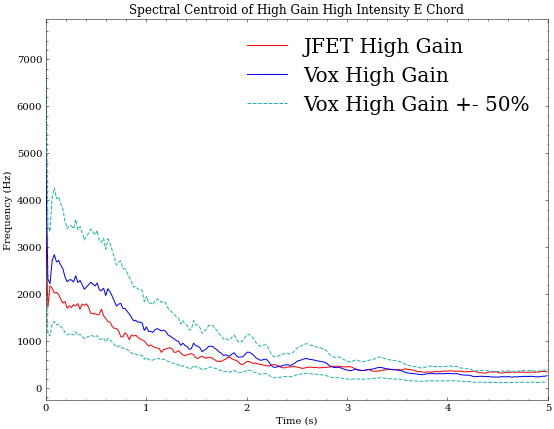

In [28]:
plt.figure(figsize=(9,7))
#plt.rcParams.update({'font.size': 20})

plt.plot(t, sc_JFET_Hi_Gain_E_Chord_Hi, color='r', label="JFET High Gain" )

plt.plot(t, sc_Vox_Hi_Gain_E_Chord_Hi, color='b', label="Vox High Gain" )
plt.plot(t, sc_Vox_Hi_Gain_E_Chord_Hi_plus50, "--", color='lightseagreen', label="Vox High Gain +- 50%")
plt.plot(t, sc_Vox_Hi_Gain_E_Chord_Hi_minus50, "--", color='lightseagreen')


#plt.plot(t, sc_VoxR, color='b', label="Real Vox" )

plt.legend(fontsize=20)

plt.title("Spectral Centroid of High Gain High Intensity E Chord")
plt.ylabel("Frequency (Hz)")
plt.xlabel('Time (s)')


plt.xlim(0, 5)
#plt.yscale('log')
plt.show()

In [29]:
SpecCen_error(JFET_Hi_Gain_E_Chord_Hi, Vox_Hi_Gain_E_Chord_Hi, FRAME_SIZE, HOP_SIZE)

[-25.8, -22.98, -12.89, 7.31, 34.87, -3.88]

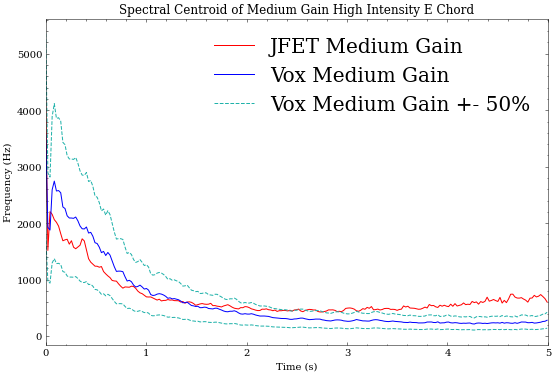

In [30]:
plt.figure(figsize=(9,6))
#plt.rcParams.update({'font.size': 20})

plt.plot(t, sc_JFET_Med_Gain_E_Chord_Hi, color='r', label="JFET Medium Gain" )

plt.plot(t, sc_Vox_Med_Gain_E_Chord_Hi, color='b', label="Vox Medium Gain" )
plt.plot(t, sc_Vox_Med_Gain_E_Chord_Hi_plus50, "--", color='lightseagreen', label="Vox Medium Gain +- 50%")
plt.plot(t, sc_Vox_Med_Gain_E_Chord_Hi_minus50, "--", color='lightseagreen')

#plt.plot(t, sc_VoxR, color='b', label="Real Vox" )

plt.legend(fontsize=20)

plt.title("Spectral Centroid of Medium Gain High Intensity E Chord")
plt.ylabel("Frequency (Hz)")
plt.xlabel('Time (s)')


plt.xlim(0, 5)
#plt.yscale('log')
plt.show()

In [31]:
SpecCen_error(JFET_Med_Gain_E_Chord_Hi,Vox_Med_Gain_E_Chord_Hi, FRAME_SIZE, HOP_SIZE)

[-18.22, 5.62, 46.8, 93.5, 166.92, 58.67]

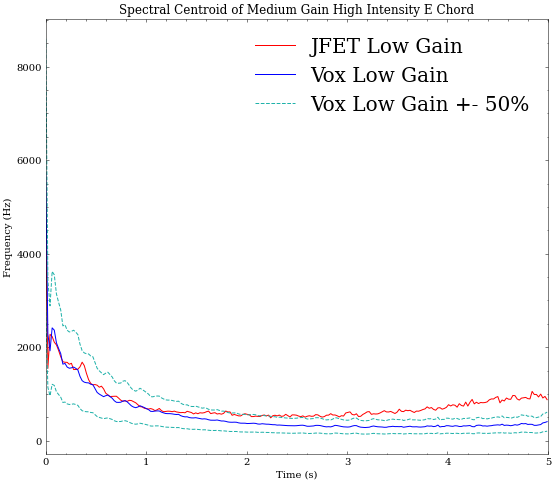

In [32]:
plt.figure(figsize=(9,8))
#plt.rcParams.update({'font.size': 20})

plt.plot(t, sc_JFET_Low_Gain_E_Chord_Hi, color='r', label="JFET Low Gain" )

plt.plot(t, sc_Vox_Low_Gain_E_Chord_Hi, color='b', label="Vox Low Gain" )
plt.plot(t, sc_Vox_Low_Gain_E_Chord_Hi_plus50, "--", color='lightseagreen', label="Vox Low Gain +- 50%")
plt.plot(t, sc_Vox_Low_Gain_E_Chord_Hi_minus50, "--", color='lightseagreen')

#plt.plot(t, sc_VoxR, color='b', label="Real Vox" )

plt.legend(fontsize=20)

plt.title("Spectral Centroid of Medium Gain High Intensity E Chord")
plt.ylabel("Frequency (Hz)")
plt.xlabel('Time (s)')


plt.xlim(0, 5)
#plt.yscale('log')
#plt.xscale('log')
plt.show()

In [33]:
SpecCen_error(JFET_Low_Gain_E_Chord_Hi,Vox_Low_Gain_E_Chord_Hi, FRAME_SIZE, HOP_SIZE)

[5.21, 24.25, 63.03, 107.83, 160.07, 71.78]

# E Chord Result

## High Intensity

### High Gain

In [34]:
SpecCen_error(JFET_Hi_Gain_E_Chord_Hi, Vox_Hi_Gain_E_Chord_Hi, FRAME_SIZE, HOP_SIZE)

[-25.8, -22.98, -12.89, 7.31, 34.87, -3.88]

### Medium Gain

In [35]:
SpecCen_error(JFET_Med_Gain_E_Chord_Hi, Vox_Med_Gain_E_Chord_Hi, FRAME_SIZE, HOP_SIZE)

[-18.22, 5.62, 46.8, 93.5, 166.92, 58.67]

### Low Gain

In [36]:
SpecCen_error(JFET_Low_Gain_E_Chord_Hi, Vox_Low_Gain_E_Chord_Hi, FRAME_SIZE, HOP_SIZE)

[5.21, 24.25, 63.03, 107.83, 160.07, 71.78]

## Medium Intensity

### High Gain

In [37]:
SpecCen_error(JFET_Hi_Gain_E_Chord_Med, Vox_Hi_Gain_E_Chord_Med, FRAME_SIZE, HOP_SIZE)

[-20.9, -15.88, 5.27, 18.06, 38.57, 5.0]

### Medium Gain

In [38]:
SpecCen_error(JFET_Med_Gain_E_Chord_Med, Vox_Med_Gain_E_Chord_Med, FRAME_SIZE, HOP_SIZE)

[-10.3, 22.63, 66.12, 110.33, 153.97, 68.26]

### Low Gain

In [39]:
SpecCen_error(JFET_Low_Gain_E_Chord_Med, Vox_Low_Gain_E_Chord_Med, FRAME_SIZE, HOP_SIZE)

[2.76, 35.85, 81.63, 121.97, 156.16, 79.34]

## Low Intensity

In [40]:
SpecCen_error(JFET_Hi_Gain_E_Chord_Lo, Vox_Hi_Gain_E_Chord_Lo, FRAME_SIZE, HOP_SIZE)

[-8.43, -0.31, 18.76, 38.64, 50.38, 19.72]

### Medium Gain

In [41]:
SpecCen_error(JFET_Med_Gain_E_Chord_Lo, Vox_Med_Gain_E_Chord_Lo, FRAME_SIZE, HOP_SIZE)

[12.54, 41.25, 103.69, 164.31, 204.8, 104.87]

### Low Gain

In [42]:
SpecCen_error(JFET_Low_Gain_E_Chord_Lo, Vox_Low_Gain_E_Chord_Lo, FRAME_SIZE, HOP_SIZE)

[7.72, 52.63, 118.85, 165.51, 188.08, 106.11]

# E2 String  Result

## High Intensity

### High Gain

In [43]:
SpecCen_error(JFET_Hi_Gain_E2_String_Hi, Vox_Hi_Gain_E2_String_Hi, FRAME_SIZE, HOP_SIZE)

[-20.77, 10.43, 14.68, 26.07, 44.25, 14.87]

### Medium Gain

In [44]:
SpecCen_error(JFET_Med_Gain_E2_String_Hi, Vox_Med_Gain_E2_String_Hi, FRAME_SIZE, HOP_SIZE)

[23.13, 105.03, 138.78, 179.44, 248.01, 138.29]

### Low Gain

In [45]:
SpecCen_error(JFET_Low_Gain_E2_String_Hi, Vox_Low_Gain_E2_String_Hi, FRAME_SIZE, HOP_SIZE)

[58.76, 106.9, 156.24, 183.28, 216.61, 143.74]

## Medium Intensity

### High Gain

In [46]:
SpecCen_error(JFET_Hi_Gain_E2_String_Med, Vox_Hi_Gain_E2_String_Med, FRAME_SIZE, HOP_SIZE)

[-20.05, 7.34, 10.01, 33.05, 45.55, 15.12]

### Medium Gain

In [47]:
SpecCen_error(JFET_Med_Gain_E2_String_Med, Vox_Med_Gain_E2_String_Med, FRAME_SIZE, HOP_SIZE)

[28.18, 109.78, 136.9, 193.26, 221.85, 137.41]

### Low Gain

In [48]:
SpecCen_error(JFET_Low_Gain_E2_String_Med, Vox_Low_Gain_E2_String_Med, FRAME_SIZE, HOP_SIZE)

[56.34, 129.05, 155.76, 198.39, 211.83, 149.64]

## Low Intensity

### High Gain

In [49]:
SpecCen_error(JFET_Hi_Gain_E2_String_Lo, Vox_Hi_Gain_E2_String_Lo, FRAME_SIZE, HOP_SIZE)

[-7.34, 26.7, 37.45, 50.22, 66.22, 34.51]

### Medium Gain

In [50]:
SpecCen_error(JFET_Med_Gain_E2_String_Lo, Vox_Med_Gain_E2_String_Lo, FRAME_SIZE, HOP_SIZE)

[74.75, 154.25, 189.87, 215.1, 249.29, 175.9]

### Low Gain

In [51]:
SpecCen_error(JFET_Low_Gain_E2_String_Lo, Vox_Low_Gain_E2_String_Lo, FRAME_SIZE, HOP_SIZE)

[92.52, 167.45, 190.45, 208.15, 208.52, 172.68]

# D Chord Result

## High Intensity

### High Gain

In [52]:
SpecCen_error(JFET_Hi_Gain_D_Chord_Hi, Vox_Hi_Gain_D_Chord_Hi, FRAME_SIZE, HOP_SIZE)

[-23.44, -23.71, -4.62, 8.45, 17.97, -5.05]

### Medium Gain

In [53]:
SpecCen_error(JFET_Med_Gain_D_Chord_Hi, Vox_Med_Gain_D_Chord_Hi, FRAME_SIZE, HOP_SIZE)

[-21.12, 2.95, 60.84, 110.17, 160.97, 62.49]

### Low Gain

In [54]:
SpecCen_error(JFET_Low_Gain_D_Chord_Hi, Vox_Low_Gain_D_Chord_Hi, FRAME_SIZE, HOP_SIZE)

[-1.0, 22.8, 87.06, 141.92, 188.4, 87.47]

## Medium Intensity

### High Gain

In [55]:
SpecCen_error(JFET_Hi_Gain_D_Chord_Med, Vox_Hi_Gain_D_Chord_Med, FRAME_SIZE, HOP_SIZE)

[-18.28, -11.94, -0.3, 7.24, 20.17, -0.62]

### Medium Gain

In [56]:
SpecCen_error(JFET_Med_Gain_D_Chord_Med, Vox_Med_Gain_D_Chord_Med, FRAME_SIZE, HOP_SIZE)

[-12.28, 14.2, 67.43, 109.98, 152.57, 66.1]

### Low Gain

In [57]:
SpecCen_error(JFET_Low_Gain_D_Chord_Med, Vox_Low_Gain_D_Chord_Med, FRAME_SIZE, HOP_SIZE)

[-1.93, 29.73, 95.81, 145.1, 172.09, 87.79]

## Low Intensity

### High Gain

In [58]:
SpecCen_error(JFET_Hi_Gain_D_Chord_Lo, Vox_Hi_Gain_D_Chord_Lo, FRAME_SIZE, HOP_SIZE)

[-15.18, -4.04, 9.88, 18.34, 27.36, 7.24]

### Medium Gain

In [59]:
SpecCen_error(JFET_Med_Gain_D_Chord_Lo, Vox_Med_Gain_D_Chord_Lo, FRAME_SIZE, HOP_SIZE)

[0.75, 48.0, 107.24, 151.39, 174.62, 95.99]

### Low Gain

In [60]:
SpecCen_error(JFET_Low_Gain_D_Chord_Lo, Vox_Low_Gain_D_Chord_Lo, FRAME_SIZE, HOP_SIZE)

[7.43, 71.29, 136.49, 165.72, 160.42, 107.81]

# E4 String Result

## High Intensity

### High Gain

In [61]:
SpecCen_error(JFET_Hi_Gain_E4_String_Hi, Vox_Hi_Gain_E4_String_Hi, FRAME_SIZE, HOP_SIZE)

[-12.36, -10.62, 9.69, 18.79, 22.55, 5.59]

### Medium Gain

In [62]:
SpecCen_error(JFET_Med_Gain_E4_String_Hi, Vox_Med_Gain_E4_String_Hi, FRAME_SIZE, HOP_SIZE)

[-14.6, 19.79, 95.11, 115.71, 86.62, 60.27]

### Low Gain

In [63]:
SpecCen_error(JFET_Low_Gain_E4_String_Hi, Vox_Low_Gain_E4_String_Hi, FRAME_SIZE, HOP_SIZE)

[-15.18, 28.25, 99.36, 92.58, 54.69, 51.72]

## Medium Intensity

### High Gain

In [64]:
SpecCen_error(JFET_Hi_Gain_E4_String_Med, Vox_Hi_Gain_E4_String_Med, FRAME_SIZE, HOP_SIZE)

[-14.23, -7.99, 12.99, 26.17, 28.27, 9.0]

### Medium Gain

In [65]:
SpecCen_error(JFET_Med_Gain_E4_String_Med, Vox_Med_Gain_E4_String_Med, FRAME_SIZE, HOP_SIZE)

[-6.65, 42.15, 114.89, 115.49, 69.26, 66.74]

### Low Gain

In [66]:
SpecCen_error(JFET_Low_Gain_E4_String_Med, Vox_Low_Gain_E4_String_Med, FRAME_SIZE, HOP_SIZE)

[-4.81, 51.44, 103.97, 83.1, 39.45, 54.4]

## Low Intensity

### High Gain

In [67]:
SpecCen_error(JFET_Hi_Gain_E4_String_Lo, Vox_Hi_Gain_E4_String_Lo, FRAME_SIZE, HOP_SIZE)

[-4.17, 2.4, 14.22, 20.37, 21.9, 10.9]

### Medium Gain

In [68]:
SpecCen_error(JFET_Med_Gain_E4_String_Lo, Vox_Med_Gain_E4_String_Lo, FRAME_SIZE, HOP_SIZE)

[4.58, 68.6, 118.63, 82.02, 67.04, 67.88]

### Low Gain

In [69]:
SpecCen_error(JFET_Low_Gain_E4_String_Lo, Vox_Low_Gain_E4_String_Lo, FRAME_SIZE, HOP_SIZE)

[8.33, 80.71, 104.85, 57.7, 41.67, 58.41]

# D3 String Result

## High Intensity

### High Gain

In [70]:
SpecCen_error(JFET_Hi_Gain_D3_String_Hi, Vox_Hi_Gain_D3_String_Hi, FRAME_SIZE, HOP_SIZE)

[-14.46, -10.74, 9.99, 21.31, 21.58, 5.51]

### Medium Gain

In [71]:
SpecCen_error(JFET_Med_Gain_D3_String_Hi, Vox_Med_Gain_D3_String_Hi, FRAME_SIZE, HOP_SIZE)

[17.67, 58.54, 100.7, 133.05, 165.32, 94.66]

### Low Gain

In [72]:
SpecCen_error(JFET_Low_Gain_D3_String_Hi, Vox_Low_Gain_D3_String_Hi, FRAME_SIZE, HOP_SIZE)

[32.45, 91.05, 136.43, 160.43, 184.84, 120.53]

## Medium Intensity

### High Gain

In [73]:
SpecCen_error(JFET_Hi_Gain_D3_String_Med, Vox_Hi_Gain_D3_String_Med, FRAME_SIZE, HOP_SIZE)

[-15.72, 0.22, 18.7, 30.63, 29.04, 12.52]

### Medium Gain

In [74]:
SpecCen_error(JFET_Med_Gain_D3_String_Med, Vox_Med_Gain_D3_String_Med, FRAME_SIZE, HOP_SIZE)

[41.03, 108.8, 149.23, 177.43, 194.87, 133.7]

### Low Gain

In [75]:
SpecCen_error(JFET_Low_Gain_D3_String_Med, Vox_Low_Gain_D3_String_Med, FRAME_SIZE, HOP_SIZE)

[61.48, 142.17, 169.36, 184.12, 179.67, 146.74]

## Low Intensity

### High Gain

In [76]:
SpecCen_error(JFET_Hi_Gain_D3_String_Lo, Vox_Hi_Gain_D3_String_Lo, FRAME_SIZE, HOP_SIZE)

[-13.42, 11.11, 11.22, 25.36, 19.64, 10.74]

### Medium Gain

In [77]:
SpecCen_error(JFET_Med_Gain_D3_String_Lo, Vox_Med_Gain_D3_String_Lo, FRAME_SIZE, HOP_SIZE)

[55.33, 118.5, 124.62, 149.0, 149.85, 118.95]

### Low Gain

In [78]:
SpecCen_error(JFET_Low_Gain_D3_String_Lo, Vox_Low_Gain_D3_String_Lo, FRAME_SIZE, HOP_SIZE)

[74.93, 140.76, 140.88, 147.61, 135.31, 127.35]

# Verification TEST

In [79]:
sc_Reference_500 = librosa.feature.spectral_centroid(y=Reference_500, sr=srt,n_fft=FRAME_SIZE, hop_length=HOP_SIZE)[0]
sc_Step_tone = librosa.feature.spectral_centroid(y=Step_tone, sr=srt,n_fft=FRAME_SIZE, hop_length=HOP_SIZE)[0]

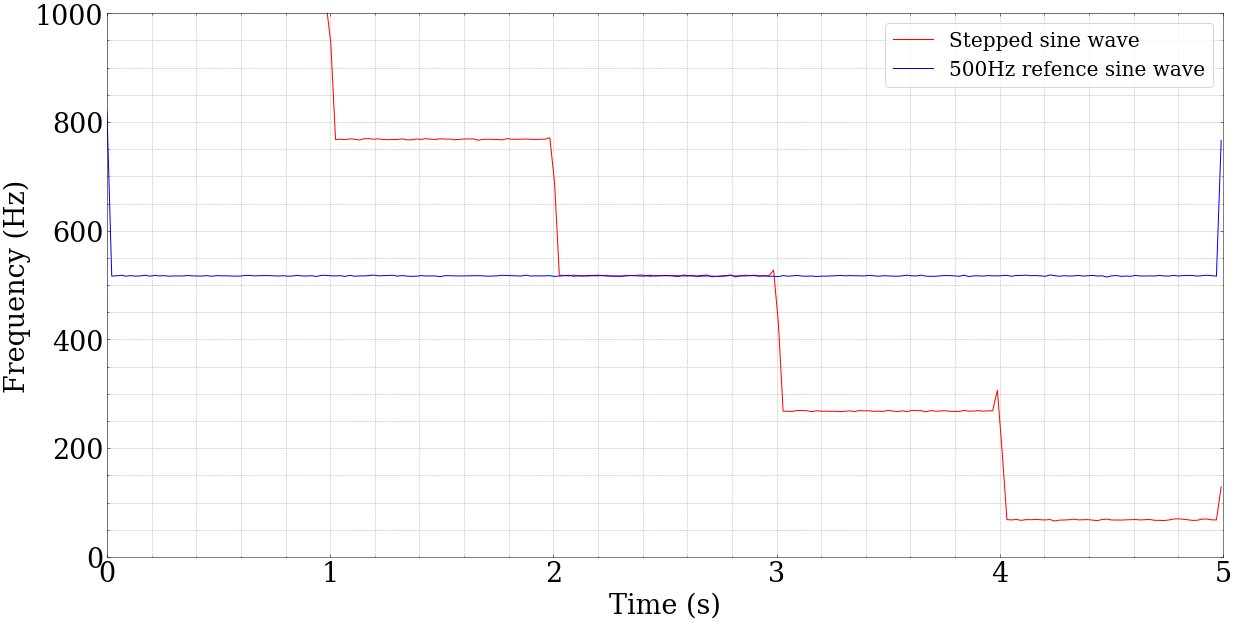

In [80]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 27})

plt.plot(t, sc_Step_tone, color='r', label="Stepped sine wave" )

plt.plot(t, sc_Reference_500, color='b', label="500Hz refence sine wave" )


plt.legend(fontsize=20)

#plt.title("Spectral Centroid of High Gain High Intensity E Chord")
plt.ylabel("Frequency (Hz)")
plt.xlabel('Time (s)')

plt.grid(True, which="both", linestyle='--')

plt.ylim(0,1000)
plt.xlim(0, 5)
plt.legend(fontsize=20, frameon=True, loc='upper right' )
#plt.yscale('log')
plt.show()

In [81]:
SpecCen_error(Step_tone, Reference_500, FRAME_SIZE, HOP_SIZE)

[96.31, 49.33, 0.78, -47.27, -86.21, 2.58]

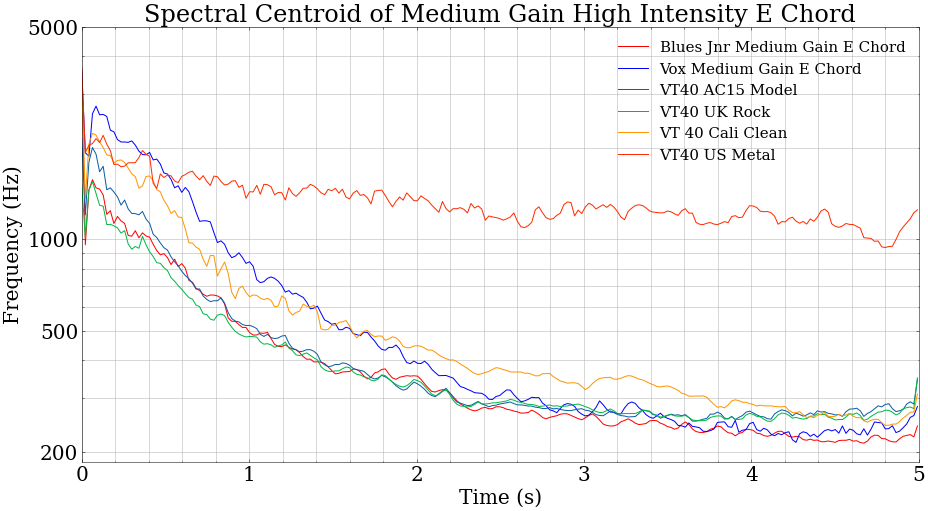

In [82]:
plt.figure(figsize=(15,8))
plt.rcParams.update({'font.size': 20})

plt.plot(t, sc_BluesJnr_Med_Gain_E_Chord_Hi, color='red', label="Blues Jnr Medium Gain E Chord" )

plt.plot(t, sc_Vox_Med_Gain_E_Chord_Hi, color='b', label="Vox Medium Gain E Chord" )

plt.plot(t, sc_VT40_AC15_E_Chord_Hi, label="VT40 AC15 Model" )

#plt.plot(t, sc_JFET_Hi_Gain_E_Chord_Hi, color='r',  label="JFET")

plt.plot(t, sc_VT40_UKRock_E_Chord_Hi,  label="VT40 UK Rock")

plt.plot(t, sc_VT40_Cali_E_Chord_Hi,  label="VT 40 Cali Clean")

plt.plot(t, sc_VT40_USMetal_E_Chord_Hi,  label="VT40 US Metal")



#plt.plot(t, sc_VoxR, color='b', label="Real Vox" )

plt.legend(fontsize=15)

plt.title("Spectral Centroid of Medium Gain High Intensity E Chord")
plt.ylabel("Frequency (Hz)")
plt.xlabel('Time (s)')



plt.xlim(0, 5)
plt.yscale('log')
plt.yticks(ticks=[200, 500, 1000, 5000], labels=[200, 500, 1000, 5000])
plt.grid(True, which="both", linestyle='-')
plt.show()

# Test

In [83]:
FrameS_stft = 4096
HopS_stft = 2048

In [84]:
S_EChord = librosa.stft(Vox_Med_Gain_E_Chord_Hi, n_fft=FrameS_stft, hop_length=HopS_stft)

In [85]:
S_EChord.shape

(2049, 118)

In [86]:
Y_Echord = np.abs(S_EChord)**2

In [87]:
Y_log_Echord = librosa.power_to_db(Y_Echord)

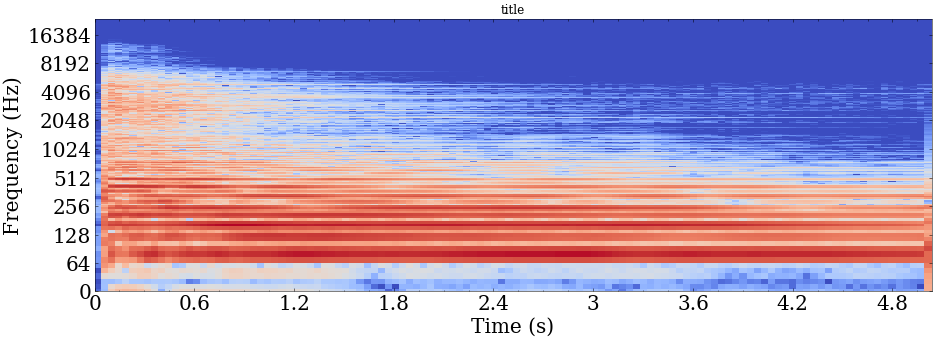

In [88]:
plot_spectrogram(Y_log_Echord, sr=sr, hop_length=HopS_stft, y_axis='log')

In [92]:
spec, freqs, t2 = mlab.specgram(Dry_D_Chord_Hi, Fs=sr, NFFT=512)

In [93]:
Y, X, Z = freqs[:round(freqs.size * 0.66), None], t[None, :], spec[:round(freqs.size * 0.66), ]

In [96]:
round(freqs.size * 0.66)

170

In [98]:
spec_norm = Normalise(spec)

In [99]:
np.min(spec_norm)

6.250572021725667e-19

In [100]:
log_specnorm = 20*np.log10(spec_norm)

In [101]:
np.min(log_specnorm)

-364.08160472668243

In [1]:
log_specnorm[log_specnorm < -200] =-200 

NameError: name 'log_specnorm' is not defined

C:\Users\aidan\anaconda3\lib\site-packages\matplotlib\ticker.py:2957: RuntimeWarning: invalid value encountered in log10
  majorstep_no_exponent = 10 ** (np.log10(majorstep) % 1)
C:\Users\aidan\anaconda3\lib\site-packages\matplotlib\ticker.py:2957: RuntimeWarning: invalid value encountered in double_scalars
  majorstep_no_exponent = 10 ** (np.log10(majorstep) % 1)


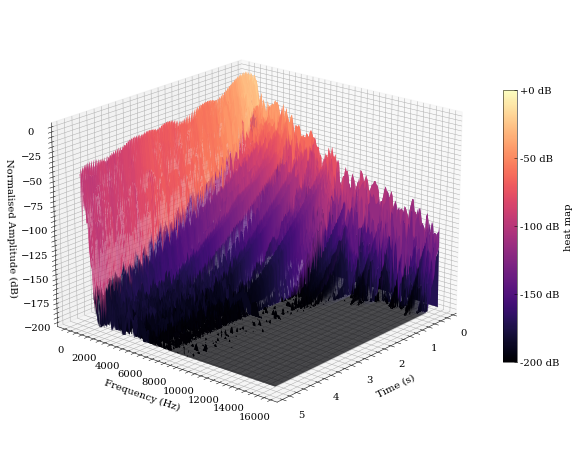

In [104]:

fig1, ax1 = plt.subplots(subplot_kw={'projection': '3d'}, figsize=(10, 10))
 
specgram3d(Dry_E_Chord_Hi, srate=sr, ax = ax1)

plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

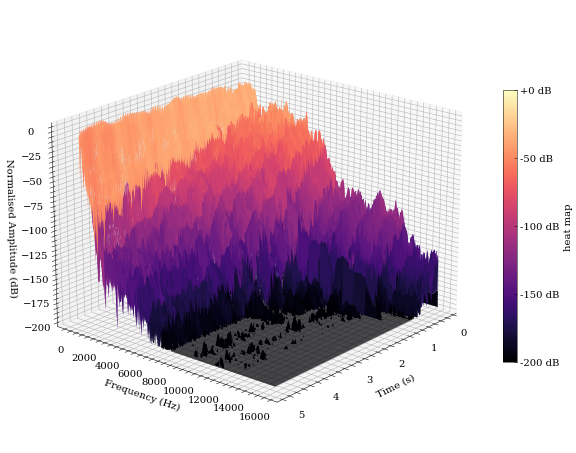

In [105]:

fig1, ax1 = plt.subplots(subplot_kw={'projection': '3d'}, figsize=(10, 10))
 
specgram3d(Vox_Hi_Gain_E_Chord_Hi, srate=sr, ax = ax1)

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

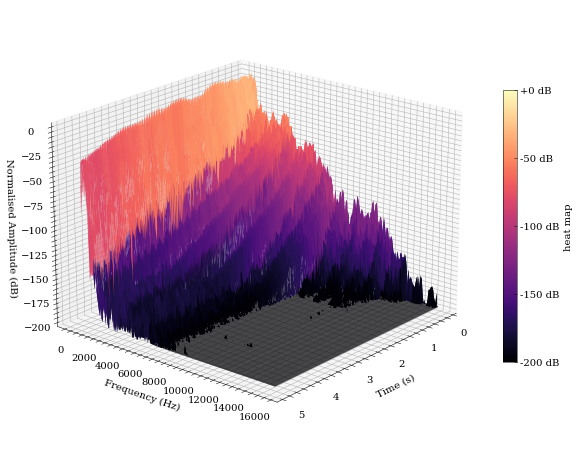

In [106]:

fig1, ax1 = plt.subplots(subplot_kw={'projection': '3d'}, figsize=(10, 10))
 
specgram3d(VT40_UKRock_E_Chord_Hi, srate=sr, ax = ax1)

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

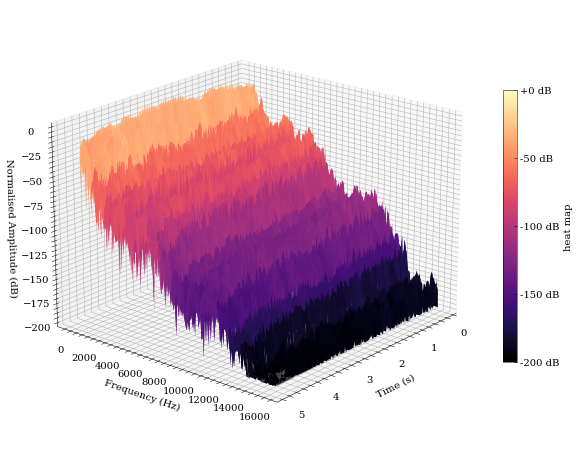

In [107]:

fig1, ax1 = plt.subplots(subplot_kw={'projection': '3d'}, figsize=(10, 10))
 
specgram3d(VT40_USMetal_E_Chord_Hi, srate=sr, ax = ax1)

plt.show